In [1]:
 ! pip install nbformat

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import os
import scipy
import networkx as nx
from pyvis.network import Network
import itertools
import IPython.display as ipd
import nltk
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import nbformat

/var/folders/rk/4jygjm4j35zcstlykt6f_j6c0000gn/T/ipykernel_57884/703778076.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
os.getcwd()

'/Users/callumrobinson/Documents/Masters/Skills/Group 2'

In [4]:
#Importing data
sk_data = pd.read_csv("/Users/callumrobinson/Documents/Masters/Skills/Group 2/articles.B2M.csv")
print(sk_data)

         PMID                                              Title  \
0    10575721  [Computer-assisted preoperative planning of kn...   
1    10617805  [Urogenital amyloidosis: clinico-pathological ...   
2    10656443  Serum beta-2 microglobulin levels are a signif...   
3    10790290  Exposure of Daudi cells to low-frequency magne...   
4    10793017  Effects of dialyzer reuse on the permeability ...   
..        ...                                                ...   
660  37889281  Artificial intelligence in early detection and...   
661  37972698  Screening the optimal housekeeping genes (HKGs...   
662  38048169  Proteomics Analysis of Serum Reveals Potential...   
663  38053293  Highly efficient genome editing via CRISPR-Cas...   
664  38092161  Identification and validation of stable refere...   

                                              Abstract       ISSN  \
0    The general configuration of replaced knee is ...  0035-1040   
1    Amyloidosis of the genito-urinary tract 

In [5]:
# Finding how many unique names appear multiple times? (surname)
all_names = np.unique(sk_data['FirstAuthorLastname']).tolist()
print(len(all_names))
print(len(sk_data['FirstAuthorLastname']))
print(len(sk_data['FirstAuthorLastname'])-len(all_names))


523
665
142


In [6]:
# Finding how many names appear multiple times (full name)
full_name = sk_data['FirstAuthorForename'] + ' ' + sk_data['FirstAuthorLastname']
print(len(full_name) - len(np.unique(full_name))) #so there are 31 names which appear multiple times
print(full_name)

31
0        E Nerkowski
1        M Esslimani
2        J Rodriguez
3      C A Morehouse
4          J P Matos
           ...      
660     Rupesh Raina
661      Nanjian Luo
662       Taohua Lan
663       A Reum Han
664    Mahanthi Vasu
Length: 665, dtype: object


In [7]:
#which names appear the most frequently
sorted_auth = Counter(full_name)
print(sorted_auth)


Counter({'Mariana Ferreira Leal': 4, 'Meredith C Foster': 3, 'Changhoon Yoo': 3, 'Nontaphat Thongsin': 3, 'Xunwei Wu': 2, 'Taiyi Jin': 2, 'Renfu Yin': 2, 'Yi Ma': 2, 'Robert Rekawiecki': 2, 'C Haas': 2, 'Malgorzata Krzystek-Korpacka': 2, 'Xiuying Li': 2, 'Lesley A Inker': 2, 'I-Hua Chen': 2, 'Kellie B Haworth': 2, 'F M McGovern': 2, 'Shean-Jaw Chiou': 2, 'Johannes Breyer': 2, 'Yu Du': 2, 'Benjamin J Feinberg': 2, 'Gilar Gorji-Bahri': 2, 'Maria Rasmussen': 2, 'Swati Agrawal': 2, 'Guo-Hua Wang': 2, 'Esben Iversen': 2, 'Xiaomeng Hu': 2, 'E Nerkowski': 1, 'M Esslimani': 1, 'J Rodriguez': 1, 'C A Morehouse': 1, 'J P Matos': 1, 'R Fonseca': 1, 'J B Lopez': 1, 'V Scudla': 1, 'K Ohashi': 1, 'H Zhou': 1, 'J E Dickens': 1, 'N Korolev': 1, 'Sharon L Mount': 1, 'Peter D Lee': 1, 'Guido Tricot': 1, 'José Luis Bedini': 1, 'Torben Moos': 1, 'P Moreau': 1, 'Avital Lev': 1, 'D M Lillington': 1, 'D Barbaric': 1, 'H Zhang': 1, 'Simona Gatto': 1, 'Christopher R E McEvoy': 1, 'E Beillard': 1, 'George T Joh

In [8]:
#Removing authors who only appear once
multi_auth = Counter(x for x in sorted_auth.elements() if sorted_auth[x] > 1)
print(multi_auth)

Counter({'Mariana Ferreira Leal': 4, 'Meredith C Foster': 3, 'Changhoon Yoo': 3, 'Nontaphat Thongsin': 3, 'Xunwei Wu': 2, 'Taiyi Jin': 2, 'Renfu Yin': 2, 'Yi Ma': 2, 'Robert Rekawiecki': 2, 'C Haas': 2, 'Malgorzata Krzystek-Korpacka': 2, 'Xiuying Li': 2, 'Lesley A Inker': 2, 'I-Hua Chen': 2, 'Kellie B Haworth': 2, 'F M McGovern': 2, 'Shean-Jaw Chiou': 2, 'Johannes Breyer': 2, 'Yu Du': 2, 'Benjamin J Feinberg': 2, 'Gilar Gorji-Bahri': 2, 'Maria Rasmussen': 2, 'Swati Agrawal': 2, 'Guo-Hua Wang': 2, 'Esben Iversen': 2, 'Xiaomeng Hu': 2})


<function matplotlib.pyplot.show(close=None, block=None)>

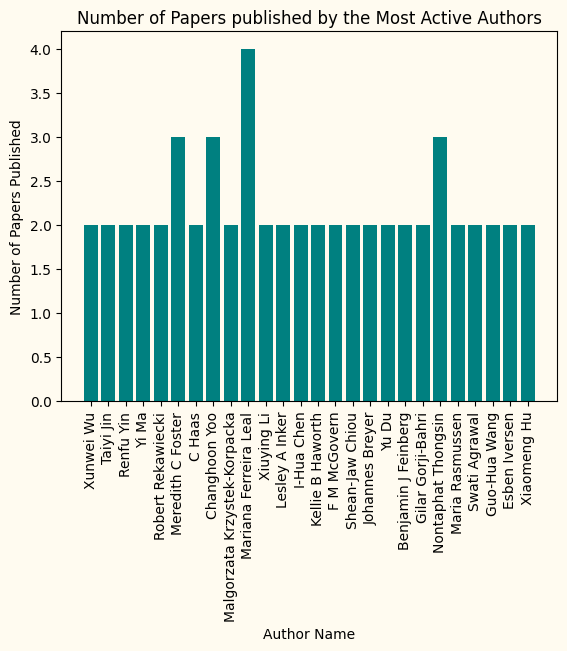

In [9]:
#plot for above data
fig = plt.figure()  #Setting colour to match presentation
fig.patch.set_facecolor('#fffbf0')
ax = plt.axes()
ax.set_facecolor('#fffbf0')
plt.bar(multi_auth.keys(), multi_auth.values(), color = 'teal')


plt.xlabel('Author Name')

plt.xticks(rotation = 90)
plt.ylabel('Number of Papers Published')
plt.title('Number of Papers published by the Most Active Authors')


plt.show


In [10]:
# Which year had the greatest proportion of B2M papers?
pub_year_data = pd.read_csv('/Users/callumrobinson/Documents/Masters/Skills/Group 2/paper_counts.csv')
b2m_year_data = Counter(sk_data['Year'])

In [11]:
print(pub_year_data)

     Year    Count
0    1799        1
1    1801        1
2    1802        1
3    1805        1
4    1866        1
..    ...      ...
138  2020  1132241
139  2021  1277048
140  2022  1324650
141  2023  1302390
142  2024    15611

[143 rows x 2 columns]


In [12]:
# adding and cleaning b2m data
b2m_year_data = pd.DataFrame.from_dict(b2m_year_data, orient='index').reset_index()
b2m_year_data = b2m_year_data.rename(columns={'index':'Year', 0:'Count'})
b2m_year_data = b2m_year_data.sort_values(by = ['Year'])
print(b2m_year_data)

    Year  Count
2   1997      2
5   1998      1
0   1999      3
1   2000      5
3   2001      2
4   2002      9
6   2003      4
7   2004      8
8   2005      5
9   2006     11
10  2007     13
11  2008     15
12  2009     18
13  2010     12
14  2011     28
15  2012     25
16  2013     38
17  2014     42
18  2015     48
19  2016     44
20  2017     36
21  2018     38
22  2019     45
23  2020     36
24  2021     53
25  2022     63
26  2023     61


In [13]:
# Cleaning pubmed data
pub_year_data = pub_year_data.iloc[115:-1,:]
pub_year_data = pub_year_data.reset_index(drop = True)

In [14]:
print(pub_year_data)

    Year    Count
0   1997   313743
1   1998   329438
2   1999   340740
3   2000   373439
4   2001   388963
5   2002   405519
6   2003   426752
7   2004   459362
8   2005   492511
9   2006   521278
10  2007   548061
11  2008   585286
12  2009   618504
13  2010   653739
14  2011   702139
15  2012   765156
16  2013   809074
17  2014   850568
18  2015   876117
19  2016   896208
20  2017   907250
21  2018   959228
22  2019   999175
23  2020  1132241
24  2021  1277048
25  2022  1324650
26  2023  1302390


<function matplotlib.pyplot.show(close=None, block=None)>

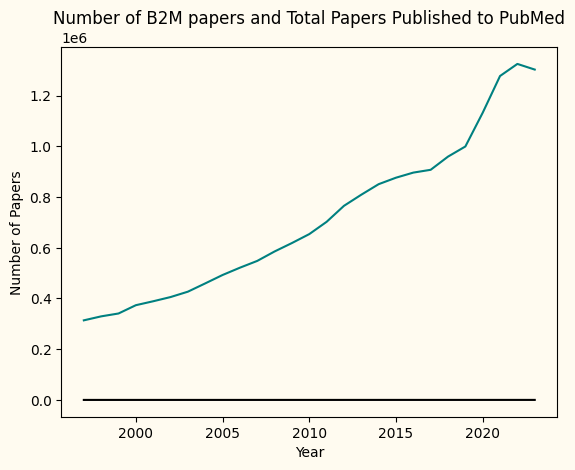

In [15]:
# Plot for total papers published
col = ['teal', 'black']
fig = plt.figure()  #Setting colour to match presentation
fig.patch.set_facecolor('#fffbf0')
ax = plt.axes()
ax.set_facecolor('#fffbf0')

plt.plot(pub_year_data['Year'], pub_year_data['Count'], c = 'teal') #Plot
plt.plot(b2m_year_data['Year'],b2m_year_data['Count'], c = 'black') 

plt.xlabel('Year') # Labels
plt.ylabel('Number of Papers')
plt.title('Number of B2M papers and Total Papers Published to PubMed')

plt.show

In [16]:
#Ratio calculation
year_ratio = b2m_year_data.Count.div(pub_year_data.Count)

In [17]:
print(year_ratio)

0     0.000010
1     0.000015
2     0.000006
3     0.000005
4     0.000023
5     0.000002
6     0.000009
7     0.000017
8     0.000010
9     0.000021
10    0.000024
11    0.000026
12    0.000029
13    0.000018
14    0.000040
15    0.000033
16    0.000047
17    0.000049
18    0.000055
19    0.000049
20    0.000040
21    0.000040
22    0.000045
23    0.000032
24    0.000042
25    0.000048
26    0.000047
Name: Count, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

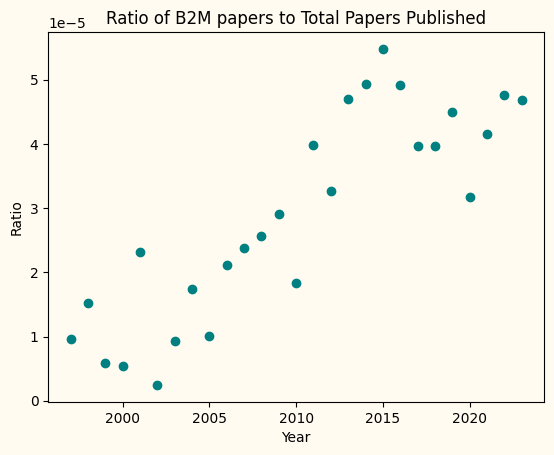

In [18]:
#plot for above data
fig = plt.figure()  #Setting colour to match presentation
fig.patch.set_facecolor('#fffbf0')
ax = plt.axes()
ax.set_facecolor('#fffbf0')

plt.scatter(pub_year_data['Year'], year_ratio, color = 'teal') #Plot

plt.xlabel('Year') # Labels
plt.ylabel('Ratio')
plt.title('Ratio of B2M papers to Total Papers Published')

plt.show


In [19]:
#Authors working together
authors = pd.read_csv('/Users/callumrobinson/Documents/Masters/Skills/Group 2/authors.B2M.csv')
print(authors.head())

       PMID  AuthorN AuthorForename AuthorLastname AuthorInitials  \
0  10575721        1              E      Nerkowski              E   
1  10575721        2              P          Calas              P   
2  10575721        3              A        Mouttet              A   
3  10617805        1              M      Esslimani              M   
4  10617805        2              I          Serre              I   

                                   AuthorAffiliation  
0                Equipe B2M, ENSAM, Aix-en-Provence.  
1                                                NaN  
2                                                NaN  
3  Service d'Anatomie Pathologique, Hôpital Gui d...  
4                                                NaN  


In [20]:
#creating full name column
AuthorFullname = authors['AuthorForename'] + ' ' + authors['AuthorLastname']
print(AuthorFullname)

0             E Nerkowski
1                 P Calas
2               A Mouttet
3             M Esslimani
4                 I Serre
              ...        
5792         Rekha Sharma
5793        Upasna Sharma
5794        Pooja Chhabra
5795              M A Mir
5796    Manoj Kumar Singh
Length: 5797, dtype: object


In [21]:
#adding full name column
authors.insert(4, 'AuthorFullname', AuthorFullname)
print(authors.head())

       PMID  AuthorN AuthorForename AuthorLastname AuthorFullname  \
0  10575721        1              E      Nerkowski    E Nerkowski   
1  10575721        2              P          Calas        P Calas   
2  10575721        3              A        Mouttet      A Mouttet   
3  10617805        1              M      Esslimani    M Esslimani   
4  10617805        2              I          Serre        I Serre   

  AuthorInitials                                  AuthorAffiliation  
0              E                Equipe B2M, ENSAM, Aix-en-Provence.  
1              P                                                NaN  
2              A                                                NaN  
3              M  Service d'Anatomie Pathologique, Hôpital Gui d...  
4              I                                                NaN  


In [22]:
#Function to create node columns
def df_to_folded_edgelist(df, node_id_col='node_id', fold_id_cols=['fold_attribute']):
        
    df_list = []
    df_orig = df.copy()
    
    #group the node ids by the fold attribute columns

    for i, f in df.groupby(fold_id_cols)[node_id_col]:
        
        # get the combinations of authors
        for x, y in itertools.combinations(f, 2):

            # add the pair and the first index from that group to a list

            df_list.append([x, y, f.first_valid_index()])


    #convert to dataframe
    df = pd.DataFrame(df_list, columns=['node_1', 'node_2', 'orig_index']) 
    
    #merge the original data so each edge now has all the other columns        
    edgelist = df.merge(df_orig, how='left', left_on='orig_index', right_index=True)

    #drop the unnecessary columns
    edgelist.drop(columns=['orig_index', node_id_col], inplace=True)
        
    return edgelist

In [23]:
#Only keeping relevant data
edgelist = df_to_folded_edgelist(authors, node_id_col='AuthorFullname', fold_id_cols='PMID')
edgelist = edgelist.drop(columns = ['AuthorInitials', 'AuthorN', 'AuthorForename', 'AuthorLastname', 'AuthorAffiliation', 'PMID'])
print(edgelist.head())

        node_1     node_2
0  E Nerkowski    P Calas
1  E Nerkowski  A Mouttet
2      P Calas  A Mouttet
3  M Esslimani    I Serre
4  M Esslimani  M Granier


In [24]:
#adding weights
authlist = edgelist.groupby(edgelist.columns.tolist()).size().reset_index().\
    rename(columns={0:'weights'})
auth_sort = authlist.sort_values('weights', ascending = False)

In [25]:
#sorting data
auth_efficient = auth_sort[auth_sort['weights'] > 2]
print(auth_efficient)

                        node_1                     node_2  weights
21784        Meredith C Foster             Andrew S Levey        5
18282           Lesley A Inker               Josef Coresh        4
21187    Marília Cardoso Smith               Moises Cohen        4
5102   Carlos Vicente Andreoli               Moises Cohen        4
5100   Carlos Vicente Andreoli             Benno Ejnisman        4
...                        ...                        ...      ...
3888                  Bin Meng               Xianhuo Wang        3
5101   Carlos Vicente Andreoli      Marília Cardoso Smith        3
21184    Marília Cardoso Smith  Alberto de Castro Pochini        3
33038               Xiuying Li                 Qiwei Yang        3
5099   Carlos Vicente Andreoli  Alberto de Castro Pochini        3

[62 rows x 3 columns]


In [26]:
#network plot (readable)
G = nx.from_pandas_edgelist(auth_efficient,
                            source='node_1',
                            target='node_2',
                            edge_attr = 'weights')
net = Network(notebook = True, bgcolor = '#fffbf0', font_color = 'black')
net.from_nx(G)

net.show('auth_efficient.html')

auth_efficient.html


In [27]:
#adding more data
auth_less_efficient = auth_sort[auth_sort['weights'] > 1]
print(auth_efficient)

                        node_1                     node_2  weights
21784        Meredith C Foster             Andrew S Levey        5
18282           Lesley A Inker               Josef Coresh        4
21187    Marília Cardoso Smith               Moises Cohen        4
5102   Carlos Vicente Andreoli               Moises Cohen        4
5100   Carlos Vicente Andreoli             Benno Ejnisman        4
...                        ...                        ...      ...
3888                  Bin Meng               Xianhuo Wang        3
5101   Carlos Vicente Andreoli      Marília Cardoso Smith        3
21184    Marília Cardoso Smith  Alberto de Castro Pochini        3
33038               Xiuying Li                 Qiwei Yang        3
5099   Carlos Vicente Andreoli  Alberto de Castro Pochini        3

[62 rows x 3 columns]


In [28]:
#network plot(unreadable dynamic centre)
G = nx.from_pandas_edgelist(auth_less_efficient,
                            source='node_1',
                            target='node_2',
                            edge_attr = 'weights')
net = Network(notebook = True, bgcolor = '#fffbf0', font_color = 'black')
net.from_nx(G)
net.show_buttons()
net.show('auth_less_efficient.html')

auth_less_efficient.html


In [29]:
#General Trends
summed_articles = sk_data.groupby('Year').count()

portion_articles = pub_year_data.merge(summed_articles, on='Year')
portion_articles = portion_articles[['Year', 'Count', 'PMID']]
portion_articles = portion_articles.rename({'PMID':'Relevant'},axis=1)
portion_articles['Percentage (%)'] = ((portion_articles['Relevant']/portion_articles['Count'])*100)
portion_articles = portion_articles.set_index('Year')
ipd.display(portion_articles)

,Count,Relevant,Percentage (%)
Year,,,
1997,313743,2,0.000637
1998,329438,1,0.000304
1999,340740,3,0.000880
2000,373439,5,0.001339
2001,388963,2,0.000514
2002,405519,9,0.002219
2003,426752,4,0.000937
2004,459362,8,0.001742
2005,492511,5,0.001015


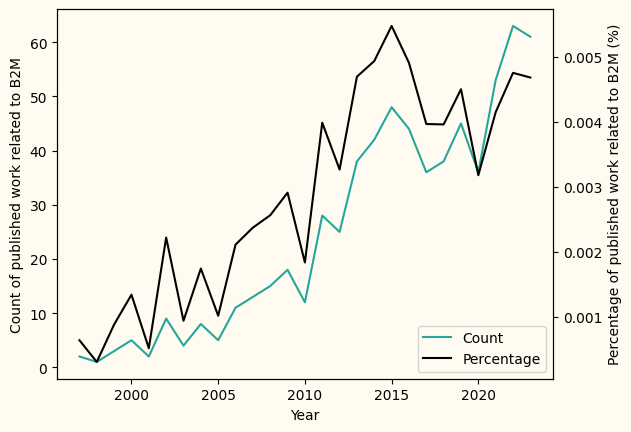

In [30]:
fig, ax1 = plt.subplots()
ax2=ax1.twinx()

portion_articles.Relevant.plot(kind='line', color='#26a69a', ax=ax1, label='Count')
ax1.tick_params(axis='y', labelcolor='black')
portion_articles['Percentage (%)'].plot(kind='line', color='black', ax=ax2, label='Percentage')
ax2.tick_params(labelcolor='black')
plot_1 = ax1.set_ylabel('Count of published work related to B2M', color='black')
plot_2 = ax2.set_ylabel('Percentage of published work related to B2M (%)', color='black')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1+lines2, labels1+labels2, loc=4, facecolor='#fffbf0')
ax1.patch.set_facecolor('#fffbf0')
fig.patch.set_facecolor('#fffbf0')

,Count,Relevant,Percentage (%),Cumulative,Year Count,Rate
Year,,,,,,
1997,313743,2,0.000637,2,1,2.000000
1998,329438,1,0.000304,3,2,1.500000
1999,340740,3,0.000880,6,3,2.000000
2000,373439,5,0.001339,11,4,2.750000
2001,388963,2,0.000514,13,5,2.600000
2002,405519,9,0.002219,22,6,3.666667
2003,426752,4,0.000937,26,7,3.714286
2004,459362,8,0.001742,34,8,4.250000
2005,492511,5,0.001015,39,9,4.333333


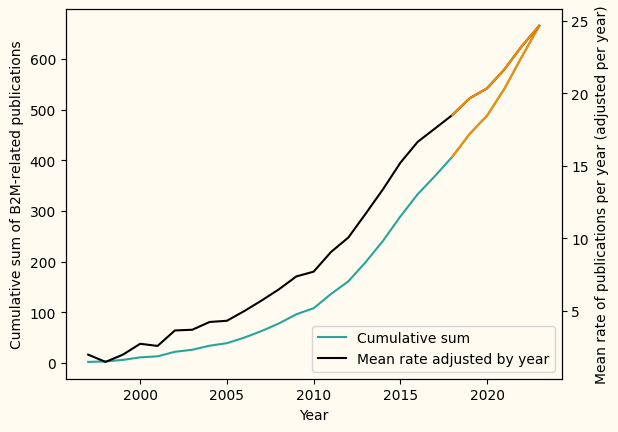

In [31]:
portion_articles['Cumulative'] = portion_articles['Relevant'].cumsum()
portion_articles['Year Count'] = range(1,len(portion_articles)+1)
portion_articles['Rate'] = portion_articles['Cumulative']/portion_articles['Year Count']
ipd.display(portion_articles)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#fb8c00
portion_articles.Cumulative.plot(kind='line', color='#26a69a', label='Cumulative sum', ax=ax1)
portion_articles.loc[2018:].Cumulative.plot(kind='line', color='#fb8c00', label='_nolegend_', ax=ax1)
ax1.set_ylabel('Cumulative sum of B2M-related publications', color='black')
ax1.patch.set_facecolor('#fffbf0')
ax1
portion_articles['Rate'].plot(kind='line', color='black', label='Mean rate adjusted by year', ax=ax2)
portion_articles.loc[2018:].Rate.plot(kind='line', color='#fb8c00', label='_nolegend_', ax=ax2)
ax2.set_ylabel('Mean rate of publications per year (adjusted per year)')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1+lines2, labels1+labels2, loc=4, facecolor='#fffbf0')
fig.patch.set_facecolor('#fffbf0')

In [32]:
nltk.download('punkt')
nltk.download('stopwords')

keywords = nltk.tokenize.word_tokenize(sk_data.Abstract.str.lower().str.replace(',',' ').str.replace('.',' ').str.replace('(',' ').str.replace(')',' ').str.cat(sep=' '))
word_dist = nltk.FreqDist(keywords)
stopwords = nltk.corpus.stopwords.words('english')
non_stop_dist = nltk.FreqDist(i for i in keywords if i not in stopwords)

common_words = pd.DataFrame(non_stop_dist.most_common(20), columns=['Words', 'Frequency'])

ipd.display(common_words)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/callumrobinson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/callumrobinson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Words,Frequency
0,genes,1271
1,b2m,1239
2,expression,1101
3,gene,766
4,reference,686
5,patients,682
6,cells,589
7,%,510
8,study,471
9,cell,414


In [33]:
# journals
impact_factors = pd.read_csv('/Users/callumrobinson/Documents/Masters/Skills/Group 2/journal if.csv')

<Figure size 1500x1200 with 0 Axes>

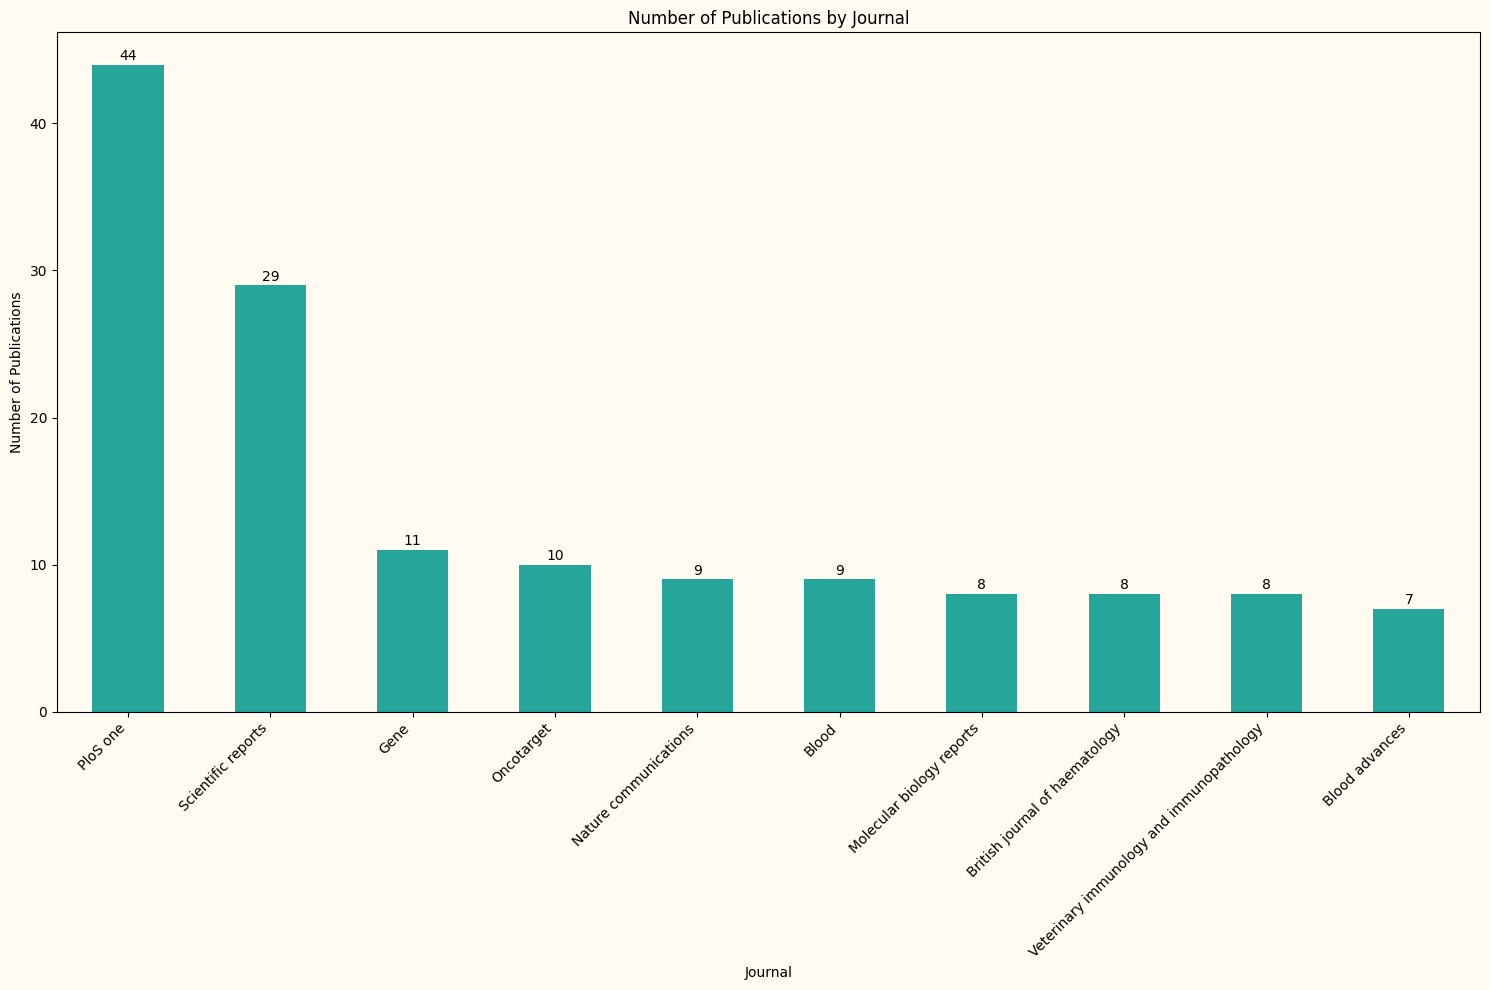

In [34]:
# Counting the number of publications for each journal
journal_counts = sk_data['Journal'].value_counts()

# Filtered journals with publication count greater than 6
journal_counts_filtered = journal_counts[journal_counts > 6]

# bar graph to visualize the number of publications by journal
plt.figure(figsize=(15, 12))
fig, ax = plt.subplots(figsize=(15, 10))

# Setting background colors for the figure and axes
fig.set_facecolor('#fffbf0')
ax.set_facecolor('#fffbf0')

# Plotting the bar graph with counts on top
bars = journal_counts_filtered.plot(kind='bar', color='#26a69a')

# Set graph title and labels
plt.title('Number of Publications by Journal')
plt.xlabel('Journal')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its count on top
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

# Adjust layout and display the graph
plt.tight_layout()
plt.show()

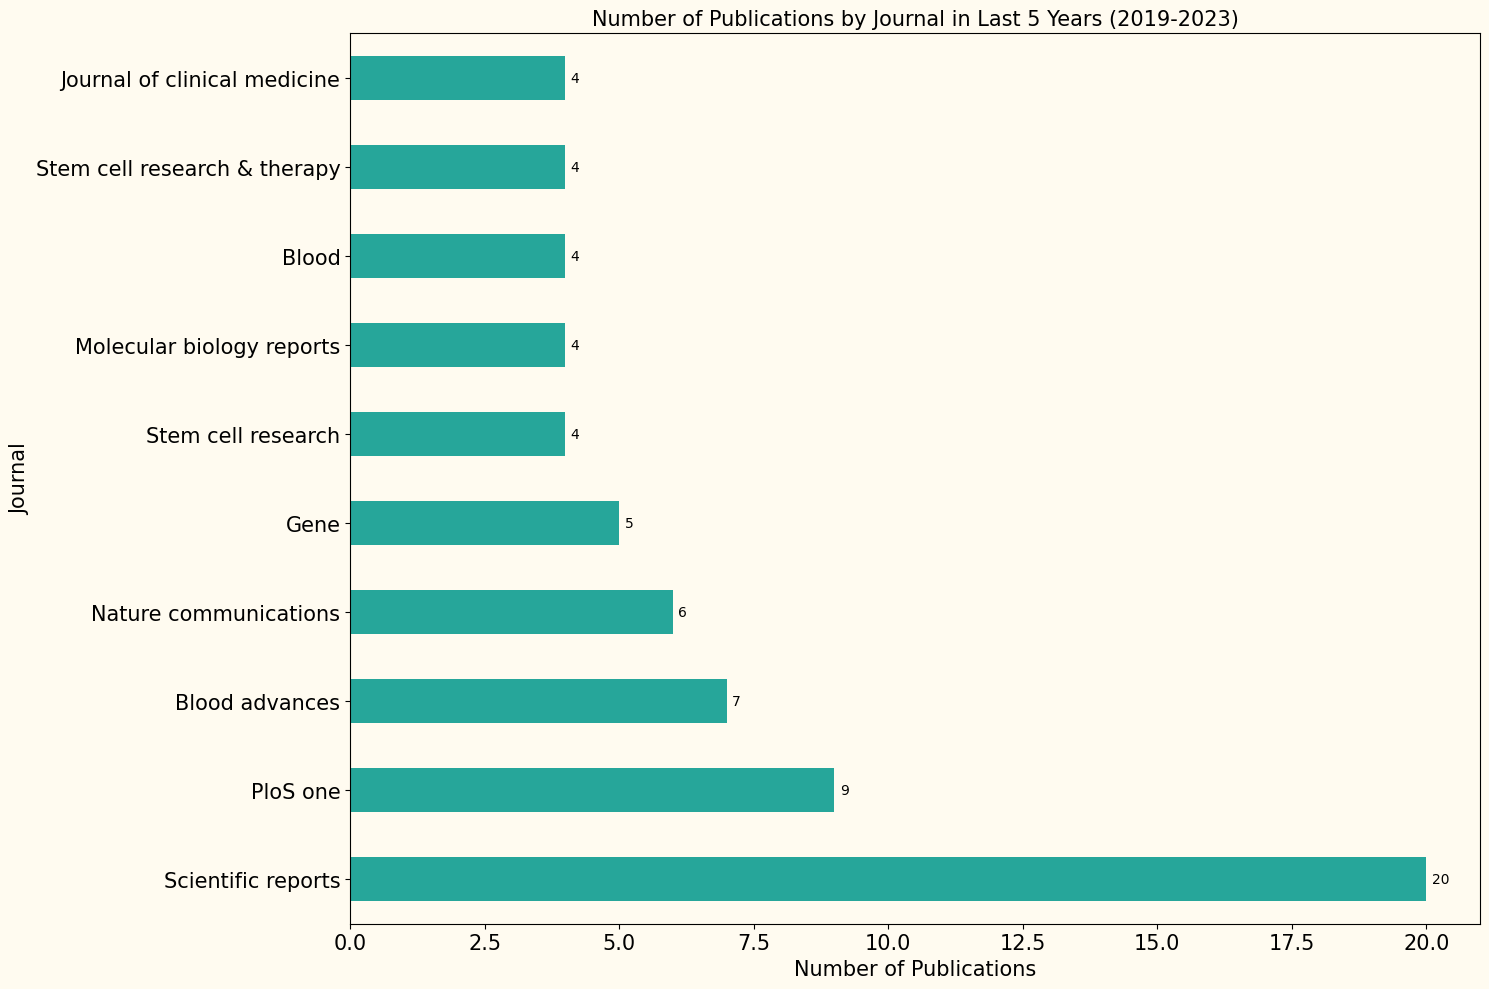

In [35]:
# Set the starting year for analysis
start_year = 2019

# Define the number of years for analysis
years_for_analysis = 5

# Filtering articles for the last 5 years
df_last_5_years = sk_data[(sk_data['Year'] >= start_year) & (sk_data['Year'] <= start_year + years_for_analysis - 1)]

# Counting the number of publications for each journal in the last 5 years
journal_counts_last_5_years = df_last_5_years['Journal'].value_counts()

# Filter journals with publication count greater than 3
journal_counts_last_5_years = journal_counts_last_5_years[journal_counts_last_5_years > 3]

# horizontal bar graph to visualize the number of publications by journal
fig, ax = plt.subplots(figsize=(15, 10))

# Set background colors for the figure and axes
fig.set_facecolor('#fffbf0')
ax.set_facecolor('#fffbf0')

# Plot the horizontal bar graph with counts on the left
bars = journal_counts_last_5_years.plot(kind='barh', color='#26a69a')

# Set graph title and labels
plt.title(f'Number of Publications by Journal in Last 5 Years (2019-2023)', fontsize=15)
plt.ylabel('Journal', fontsize=15)
plt.xlabel('Number of Publications', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Annotate each bar with its count on the left
for bar in bars.patches:
    xval = bar.get_width()
    plt.text(xval + 0.1, bar.get_y() + bar.get_height() / 2, round(xval, 1), ha='left', va='center')

# Adjust layout and display the graph
plt.tight_layout()
plt.show()

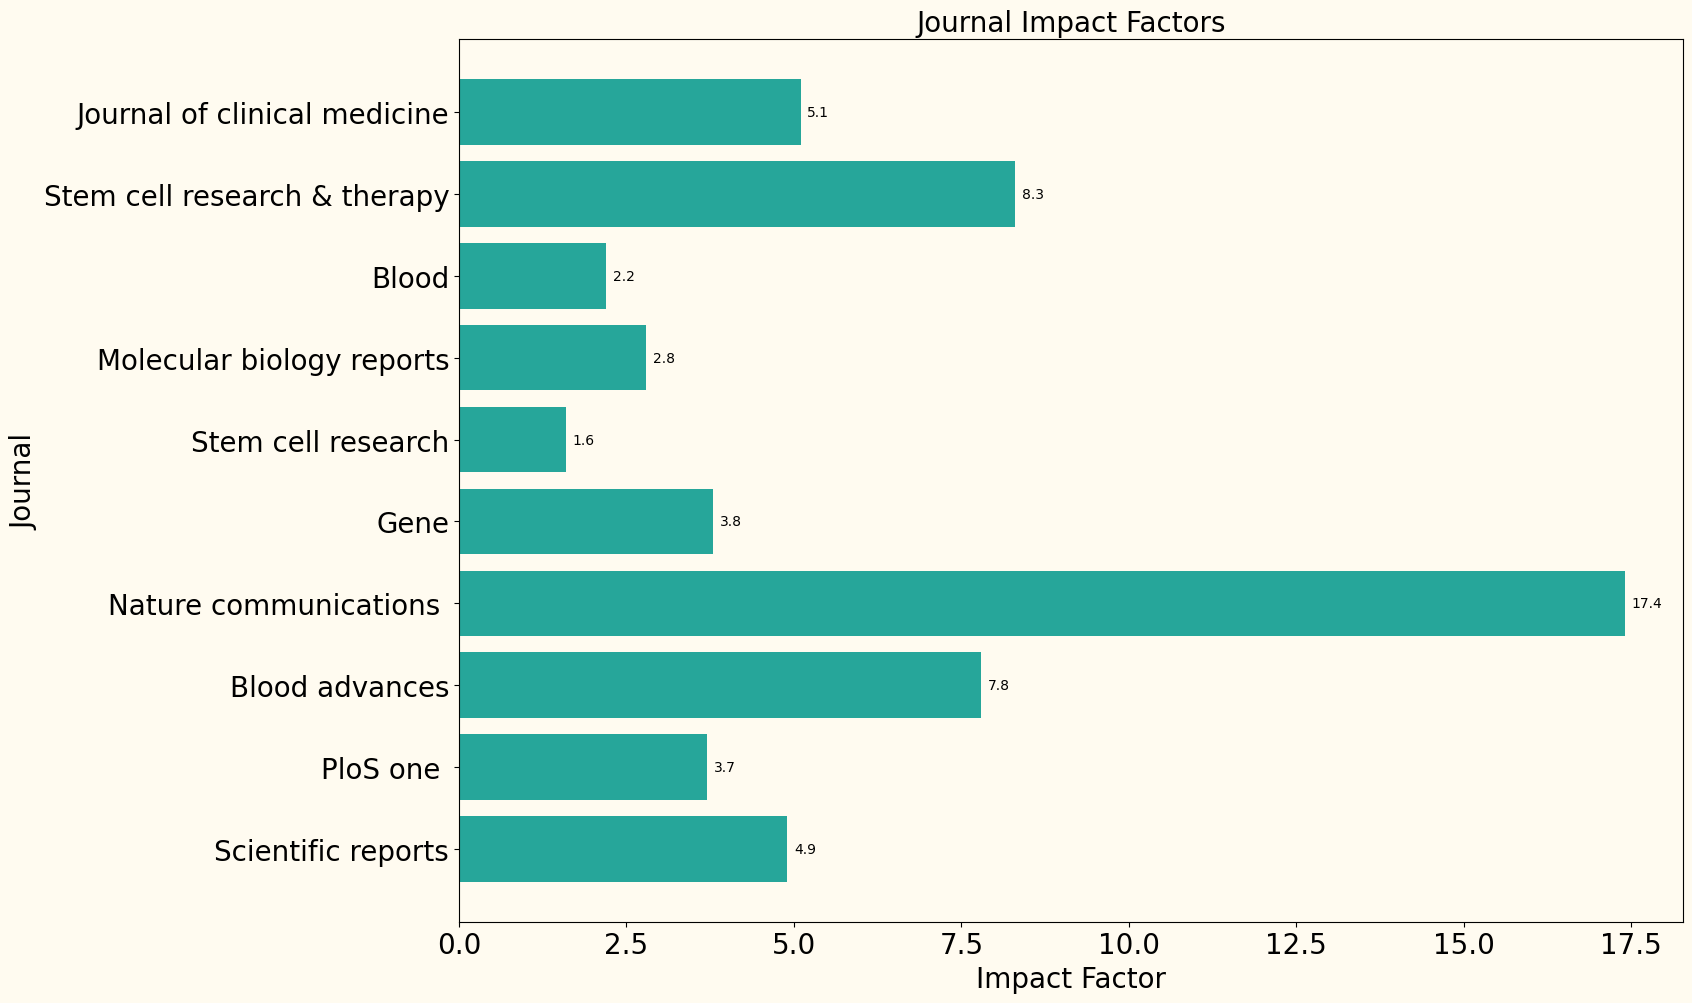

In [36]:
# Creating a subplot with a specified size
fig, ax = plt.subplots(figsize=(15, 10))

# Set background colors for the figure and axes
fig.set_facecolor('#fffbf0')
ax.set_facecolor('#fffbf0')

# horizontal bar graph to display impact factors by journal
bars = plt.barh(impact_factors['Journal'], impact_factors['Impact Factor'], color='#26a69a')

# Setting labels and title for the graph
plt.xlabel('Impact Factor', fontsize=20)
plt.ylabel('Journal', fontsize=20)
plt.title('Journal Impact Factors', fontsize=20)

# Adjust layout and font sizes
plt.tight_layout()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Annotate each bar with its value on the left
for bar in bars.patches:
    xval = bar.get_width()
    plt.text(xval + 0.1, bar.get_y() + bar.get_height() / 2, round(xval, 1), ha='left', va='center')

# Display the graph
plt.show()


In [37]:
# we used TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer to convert text data into numerical format.
# it helps us understand the importance of each word in a document relative to a collection of documents (corpus).

# TF-IDF consists of two parts:
# 1. Term Frequency (TF): It measures how often a word appears in a document.
# 2. Inverse Document Frequency (IDF): It measures how unique a word is across multiple documents.

# TF-IDF Vectorizer transforms the abstracts of scientific articles into numerical vectors, capturing the importance of each word


# Creating a TfidfVectorizer with English stop words and case conversion
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)

# Fit and transform abstracts to obtain the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df_last_5_years['Abstract'])

# feature names (words) from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Creating a DataFrame from the TF-IDF matrix with feature names as columns
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

# Sum the TF-IDF values for each term across all abstracts
term_importance = tfidf_df.sum(axis=0)

# # To get the frequency count for each term
# term_frequency = df_last_5_years['Abstract'].apply(lambda x: pd.Series(x.split())).stack().value_counts()

# term_stats_df = pd.DataFrame({
#     'TF-IDF': term_importance,
#     'Frequency': term_frequency
# })

# sorted_terms = term_stats_df.sort_values(by='TF-IDF', ascending=False)


# Sorting the terms by TF-IDF values in descending order
sorted_terms = term_importance.sort_values(ascending=False)

# top 50 terms and converting them to a dictionary
top_technical_terms = sorted_terms.head(50).to_dict()

#sorted_terms = term_importance.sort_values(ascending=False)

#top_technical_terms = sorted_terms.head(20)
top_technical_terms




{'genes': 9.439510966610648,
 'cells': 8.970853564001398,
 'b2m': 8.787109196110048,
 'cell': 8.291773537198793,
 'patients': 7.705324887490901,
 'expression': 7.102419559006374,
 'immune': 6.8516071950007955,
 'gene': 6.5425798252805185,
 'reference': 6.110472825333649,
 'hla': 6.0569682914128755,
 'cancer': 4.852975809340803,
 'tumor': 4.6617282962272615,
 'study': 4.5462631719108035,
 'microglobulin': 4.250248047011071,
 'pd': 4.1765367213679125,
 'high': 4.066646191444004,
 'analysis': 4.006285154675793,
 'associated': 3.968595398084387,
 'using': 3.9126565931043924,
 'protein': 3.865816599759232,
 'mutations': 3.820235138428765,
 'disease': 3.662175760317604,
 'human': 3.654639934473354,
 'beta': 3.560143751978223,
 'proteins': 3.473054785440355,
 'class': 3.4482151799699676,
 'based': 3.4112400382907673,
 'clinical': 3.273944460126116,
 'treatment': 3.253900255551818,
 'mhc': 3.1647730882234693,
 'kidney': 3.130056707493503,
 'related': 3.044539627410103,
 'levels': 3.00676932595

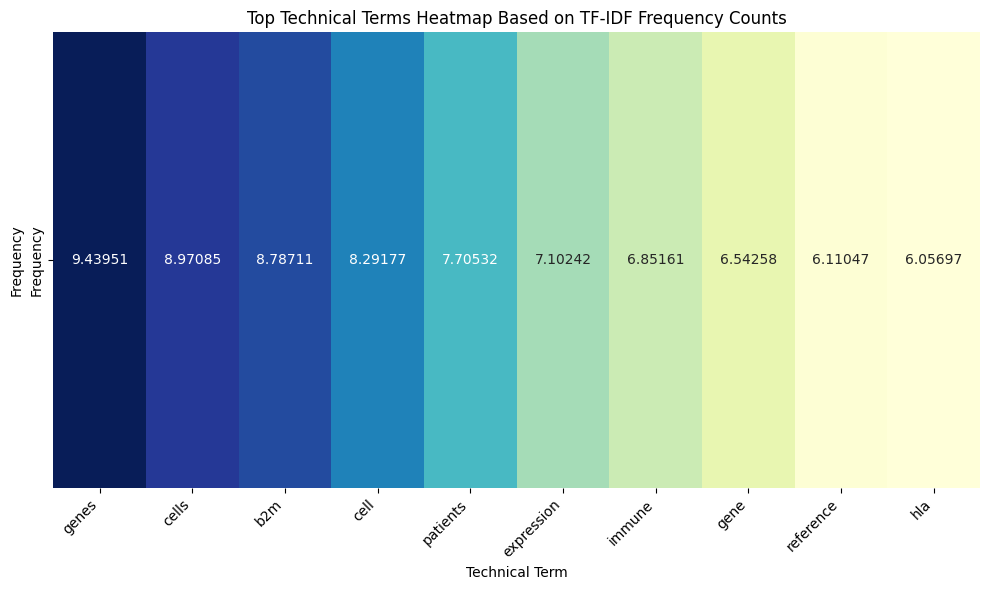

In [38]:
# Defining the number of top terms to display
num_terms_to_display = 10

# Selecting the top technical terms based on TF-IDF values
top_technical_terms = sorted_terms.head(num_terms_to_display)

# Creating a DataFrame from the top terms with 'Frequency' as the column name
heatmap_data = pd.DataFrame(top_technical_terms, columns=['Frequency'])

# Creating a heatmap using seaborn library
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.transpose(), cmap='YlGnBu', annot=True, fmt='g', cbar=False)
plt.title('Top Technical Terms Heatmap Based on TF-IDF Frequency Counts')
plt.xlabel('Technical Term')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [39]:
#Importing some important libraries for further use

#Reading the csv files

article_df = pd.read_csv('/Users/callumrobinson/Documents/Masters/Skills/Group 2/articles.B2M.csv')
authors_df = pd.read_csv("/Users/callumrobinson/Documents/Masters/Skills/Group 2/authors.B2M.csv")
pap_counts_df = pd.read_csv("/Users/callumrobinson/Documents/Masters/Skills/Group 2/paper_counts.csv")
# displaying the articles dataframe for understanding the dataset

pd.set_option('display.max_colwidth', None) # for maximise the column width to see whole text of a particular column.

display(article_df)
#display(article_df[["FirstAuthorAffiliation"]])

display(authors_df)
display(pap_counts_df)
article_df.head(6)
authors_df.head(20)
#Checking the dataframe information and NaN values

print("Common information of the Article dataset: ")
print("--------------------------")
article_df.info()
print("--------------------------")
print("The NaN vaues in the Article dataset is: ")
print("--------------------------")
article_df.isna().sum()
print("The NaN vaues in the Authors dataset is: ")
print("-------------------------------")
authors_df.isna().sum()
print("The NaN vaues in the paper count dataset is: ")
print("--------------------------")
pap_counts_df.isna().sum()
#Checking the frequency of categorical values in the Article dataset

article_df.describe(exclude = [np.number])
# Droping out the rows that have N/A in Affiliation from the Article dataset
droped_article_df  = article_df.dropna(subset = ['FirstAuthorAffiliation'])

droped_article_df.info()

## Top5 contributing institutions:
#Droping unnecessary columns

inst_1 = droped_article_df.drop(['Title','Abstract','Location','FirstAuthorInitials'], axis = 1) 
display(inst_1)

#Concatinating the Authors name:
inst_1['AuthorName'] = inst_1['FirstAuthorForename'].map(str) + ' ' + inst_1['FirstAuthorLastname'].map(str)

display(inst_1)
#Droping the unnecessary two columns

inst_2 = inst_1.drop(['FirstAuthorForename','FirstAuthorLastname'], axis = 1) 
display(inst_2)
inst_2.describe(exclude = [np.number])

# Making a dataframe for further visuaisation

inst_3 = inst_2[["PMID", "FirstAuthorAffiliation"]]


display(inst_3)
inst_4 = inst_3.groupby(["FirstAuthorAffiliation"]).count()

display(inst_4)
# Splitting the adress column
inst_5 = inst_3.FirstAuthorAffiliation.str.rsplit(',', n = 2, expand = True)

display(inst_5)
#Storing the country column into a dataframe
a  = pd.DataFrame(inst_5[2])
a.columns = ["CountryName"] #Assigining a name to colmn
inst_6 = inst_2.join(a) # Joining with the another dataframe at the start
display(inst_6)
inst_7 = inst_6["CountryName"].str.split('.', n = 1, expand = True) # Spliting again for removing email-id for more accrate country name
display(inst_7)
b  = pd.DataFrame(inst_7[0]) # Storing a country into a blank dataframe
b.columns = ["AffiliationCountry"] # Again assigning the contry name
inst_8 = inst_2.join(b) # Joining with main dataframe from a start of this task
display(inst_8)
inst_9 = inst_8[['PMID','AffiliationCountry']] # Storing two columns for further visualisations

inst_10 = inst_9.groupby(['AffiliationCountry']).count().reset_index() # Grouping the country names
#inst_10["PMID"].columns = ["Number of Publications"]
#display(inst_10)
# Making a Choropleth map 

figure = px.choropleth(inst_10.reset_index(), locations = 'AffiliationCountry', locationmode= 'country names' ,
                       color = 'PMID', width = 800, height = 800, title = "No. of papers represents Biological targets published by PubMed from various countries:")

figure.show()

inst_11 = inst_10.nlargest(5, 'PMID') # Finding a largest value in total publications
display(inst_11)

# Making a bar chart for Top 5 contributing countries
fig = px.bar(inst_11, x='AffiliationCountry', y='PMID', labels={'Count':'Total No. of publications'}, height=400, title = "Top 5 countries to publish more Biological target papers: ", text_auto='.2s', color = 'PMID')
fig.update_traces(textfont_size=20, textangle=0, textposition="outside", cliponaxis=False)
fig.show()
### Count of Number of papers published by PubMed and count of Biological target papers publications by PubMed
proportion = inst_2[["Year","PMID"]] # taking a two columns from main dataset

display(proportion)
proportion1 = proportion.groupby(["Year"]).count().reset_index() # Groupby by year

display(proportion1)
proportion2 = pap_counts_df # Again adding a columns from the main dataset to the variable

display(proportion2)
proportion3 = proportion2.iloc[115:142,:] # By indexing finding the data from 1997-2023

display(proportion3)
# Bar chart plot for visualisation

fig = px.bar(proportion3, x='Year', y='Count', labels={'Count':'Total No. of publications'}, height=400, title = "Total number of papers in PubMed in each year", text_auto='.2s', color = 'Count')
fig.update_traces(textfont_size=20, textangle=0, textposition="outside", cliponaxis=False)
fig.show()
# Another Bar chart plot for visualisation

fig = px.bar(proportion1, x='Year', y='PMID', labels={'PMID':'Total No. of publications'}, height=400, title = "Total number of papers that mentions the Biological Target", text_auto='.2s')
fig.show()


,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
0,10575721,[Computer-assisted preoperative planning of knee replacement arthroplasty].,"The general configuration of replaced knee is difficult to anticipate because of the large number of geometrical parameters related to morphology, prosthetic implants and pre-operative choices (such as ligament release). This article features the studies achieved in order to create a decision aiding computer tool dedicated to total knee prosthesis. METHOD AND MODEL: We have built a geometrical modelling of the physiological knee and prosthesis elements association. A numerical processing through biomechanical laws permitted to simulate the geometrical and mechanical behaviour of the whole for different flexing angle.",0035-1040,Revue de chirurgie orthopedique et reparatrice de l'appareil moteur,(85) 591-600,1999,E,Nerkowski,E,"Equipe B2M, ENSAM, Aix-en-Provence."
1,10617805,[Urogenital amyloidosis: clinico-pathological study of 8 cases].,"Amyloidosis of the genito-urinary tract is uncommon. We report 8 cases, often misdiagnosed as a neoplastic process (6/8). Amyloidosis was localized in the bladder (3 cases), in the ureter (1 case) and in the prostate and/or seminal vesicles (4 cases). The amyloid protein was characterized in 7 cases by immunohistochemistry. Among the bladder and ureter amyloidosis, 2 cases were classified as AL lambda amyloidosis and one case as AA amyloidosis in a patient with long history of chronic arthritis. In the fourth case, the deposits could not be identified. Nevertheless an AL amyloidosis might be suggested. Two cases of prostate and/or seminal vesicles amyloidosis were stained with an anti-B2M antibody, in hemodialyzed patients. The 2 others, positive with the anti-Transthyretina antibody, were classified as senile amyloidosis. This small series illustrated the heterogeneous pathogenic types of amyloidosis in the urogenital tract and emphasized the interest of immunohistochemistry to identify the chemical composition of these deposits.",0242-6498,Annales de pathologie,(19) 487-91,1999,M,Esslimani,M,"Service d'Anatomie Pathologique, Hôpital Gui de Chauliac, 34295 Montpellier Cedex 5."
2,10656443,Serum beta-2 microglobulin levels are a significant prognostic factor in Philadelphia chromosome-positive chronic myelogenous leukemia.,"Our objective was to investigate the prognostic significance of serum beta-2 microglobulin (B2M) levels among patients with chronic myelogenous leukemia (CML). All patients with Philadelphia chromosome-positive early chronic phase CML (i.e., within 1 year of diagnosis) treated with IFN alpha-based therapy at the M. D. Anderson Cancer Center between 1980 and 1997, in whom pretreatment B2M levels were available, were investigated. Two hundred one patients were evaluable. Their median B2M was 2.2 mg/dl (range, 1.1-20 mg/dl). Serum B2M levels were associated with other variables of prognostic significance, including age, spleen size, WBC count, percentage of peripheral and marrow blasts, and percentage of marrow basophils. Patients with B2M levels >2.9 mg/dl (ie., the upper quartile of the distribution) had a significantly lower rate of major cytogenetic response compared to those in the lower three quartiles (20 versus 52%; P < 0.01). They also had a shorter survival, with a 5-year survival rate of 48%, compared with 75% for those in the lower quartiles (P = 0.01). High B2M levels (>2.9 mg/dl) could identify a group of patients with an adverse outcome within patients in stage I disease (P = 0.02). Results for patients in stages 2-4 were inconclusive because of the small number of patients in these groups. We conclude that serum B2M levels are an important, and probably independent, prognostic factor for patients with CML in early chronic phase treated with IFN-based therapy.",1078-0432,Clinical cancer research : an official journal of the American Association f

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,10575721,1,E,Nerkowski,E,"Equipe B2M, ENSAM, Aix-en-Provence."
1,10575721,2,P,Calas,P,NaN
2,10575721,3,A,Mouttet,A,NaN
3,10617805,1,M,Esslimani,M,"Service d'Anatomie Pathologique, Hôpital Gui de Chauliac, 34295 Montpellier Cedex 5."
4,10617805,2,I,Serre,I,NaN
...,...,...,...,...,...,...
5792,38092161,6,Rekha,Sharma,R,"ICAR-National Bureau of Animal Genetic Resources, Karnal."
5793,38092161,7,Upasna,Sharma,U,"ICAR-National Bureau of Animal Genetic Resources, Karnal."
5794,38092161,8,Pooja,Chhabra,P,"ICAR-National Bureau of Animal Genetic Resources, Karnal."
5795,38092161,9,M A,Mir,MA,"Shere Kashmir University of Agricultural Sciences and Technology, Aulestang, Shuhama, Kashmir."


,Year,Count
0,1799,1
1,1801,1
2,1802,1
3,1805,1
4,1866,1
...,...,...
138,2020,1132241
139,2021,1277048
140,2022,1324650
141,2023,1302390


Common information of the Article dataset: 
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PMID                    665 non-null    int64 
 1   Title                   665 non-null    object
 2   Abstract                665 non-null    object
 3   ISSN                    665 non-null    object
 4   Journal                 665 non-null    object
 5   Location                665 non-null    object
 6   Year                    665 non-null    int64 
 7   FirstAuthorForename     665 non-null    object
 8   FirstAuthorLastname     665 non-null    object
 9   FirstAuthorInitials     665 non-null    object
 10  FirstAuthorAffiliation  659 non-null    object
dtypes: int64(2), object(9)
memory usage: 57.3+ KB
--------------------------
The NaN vaues in the Article dataset is: 
--------------------------
T

,PMID,ISSN,Journal,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorAffiliation
0,10575721,0035-1040,Revue de chirurgie orthopedique et reparatrice de l'appareil moteur,1999,E,Nerkowski,"Equipe B2M, ENSAM, Aix-en-Provence."
1,10617805,0242-6498,Annales de pathologie,1999,M,Esslimani,"Service d'Anatomie Pathologique, Hôpital Gui de Chauliac, 34295 Montpellier Cedex 5."
2,10656443,1078-0432,Clinical cancer research : an official journal of the American Association for Cancer Research,2000,J,Rodriguez,"Department of Leukemia, University of Texas M.D. Anderson Cancer Center, Houston 77030, USA."
3,10790290,0033-7587,Radiation research,2000,C A,Morehouse,"FDA Center for Devices and Radiological Health, Rockville, Maryland 20850, USA."
4,10793017,1523-6838,American journal of kidney diseases : the official journal of the National Kidney Foundation,2000,J P,Matos,"Department of Internal Medicine, Division of Nephrology, and Department of Pathology, Universidade Federal Fluminense, Niterói, Rio de Janeiro, Brazil."
...,...,...,...,...,...,...,...
659,37874452,2509-2723,GeroScience,2023,Diana I,Aparicio-Bautista,"Laboratorio de Estructura de Proteínas, Instituto Nacional de Medicina Genómica (INMEGEN), 14610, Ciudad de Mexico, Mexico."
660,37889281,1432-198X,"Pediatric nephrology (Berlin, Germany)",2023,Rupesh,Raina,"Akron Nephrology Associates/Cleveland Clinic Akron General Medical Center, Akron, OH, USA. rraina@akronchildrens.org."
661,37972698,1879-0038,Gene,2023,Nanjian,Luo,"School of Preclinical Medicine, Zunyi Medical University, Zunyi 563000, China; College of Animal Science and Technology, Southwest University, Chongqing 400715, China."
662,38048169,1535-3907,Journal of proteome research,2023,Taohua,Lan,"State Key Laboratory of Dampness Syndrome of Chinese Medicine, The Second Affiliated Hospital of Guangzhou University of Chinese Medicine, Guangzhou 510020, China."


,PMID,ISSN,Journal,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorAffiliation,AuthorName
0,10575721,0035-1040,Revue de chirurgie orthopedique et reparatrice de l'appareil moteur,1999,E,Nerkowski,"Equipe B2M, ENSAM, Aix-en-Provence.",E Nerkowski
1,10617805,0242-6498,Annales de pathologie,1999,M,Esslimani,"Service d'Anatomie Pathologique, Hôpital Gui de Chauliac, 34295 Montpellier Cedex 5.",M Esslimani
2,10656443,1078-0432,Clinical cancer research : an official journal of the American Association for Cancer Research,2000,J,Rodriguez,"Department of Leukemia, University of Texas M.D. Anderson Cancer Center, Houston 77030, USA.",J Rodriguez
3,10790290,0033-7587,Radiation research,2000,C A,Morehouse,"FDA Center for Devices and Radiological Health, Rockville, Maryland 20850, USA.",C A Morehouse
4,10793017,1523-6838,American journal of kidney diseases : the official journal of the National Kidney Foundation,2000,J P,Matos,"Department of Internal Medicine, Division of Nephrology, and Department of Pathology, Universidade Federal Fluminense, Niterói, Rio de Janeiro, Brazil.",J P Matos
...,...,...,...,...,...,...,...,...
659,37874452,2509-2723,GeroScience,2023,Diana I,Aparicio-Bautista,"Laboratorio de Estructura de Proteínas, Instituto Nacional de Medicina Genómica (INMEGEN), 14610, Ciudad de Mexico, Mexico.",Diana I Aparicio-Bautista
660,37889281,1432-198X,"Pediatric nephrology (Berlin, Germany)",2023,Rupesh,Raina,"Akron Nephrology Associates/Cleveland Clinic Akron General Medical Center, Akron, OH, USA. rraina@akronchildrens.org.",Rupesh Raina
661,37972698,1879-0038,Gene,2023,Nanjian,Luo,"School of Preclinical Medicine, Zunyi Medical University, Zunyi 563000, China; College of Animal Science and Technology, Southwest University, Chongqing 400715, China.",Nanjian Luo
662,38048169,1535-3907,Journal of proteome research,2023,Taohua,Lan,"State Key Laboratory of Dampness Syndrome of Chinese Medicine, The Second Affiliated Hospital of Guangzhou University of Chinese Medicine, Guangzhou 510020, China.",Taohua Lan


,PMID,ISSN,Journal,Year,FirstAuthorAffiliation,AuthorName
0,10575721,0035-1040,Revue de chirurgie orthopedique et reparatrice de l'appareil moteur,1999,"Equipe B2M, ENSAM, Aix-en-Provence.",E Nerkowski
1,10617805,0242-6498,Annales de pathologie,1999,"Service d'Anatomie Pathologique, Hôpital Gui de Chauliac, 34295 Montpellier Cedex 5.",M Esslimani
2,10656443,1078-0432,Clinical cancer research : an official journal of the American Association for Cancer Research,2000,"Department of Leukemia, University of Texas M.D. Anderson Cancer Center, Houston 77030, USA.",J Rodriguez
3,10790290,0033-7587,Radiation research,2000,"FDA Center for Devices and Radiological Health, Rockville, Maryland 20850, USA.",C A Morehouse
4,10793017,1523-6838,American journal of kidney diseases : the official journal of the National Kidney Foundation,2000,"Department of Internal Medicine, Division of Nephrology, and Department of Pathology, Universidade Federal Fluminense, Niterói, Rio de Janeiro, Brazil.",J P Matos
...,...,...,...,...,...,...
659,37874452,2509-2723,GeroScience,2023,"Laboratorio de Estructura de Proteínas, Instituto Nacional de Medicina Genómica (INMEGEN), 14610, Ciudad de Mexico, Mexico.",Diana I Aparicio-Bautista
660,37889281,1432-198X,"Pediatric nephrology (Berlin, Germany)",2023,"Akron Nephrology Associates/Cleveland Clinic Akron General Medical Center, Akron, OH, USA. rraina@akronchildrens.org.",Rupesh Raina
661,37972698,1879-0038,Gene,2023,"School of Preclinical Medicine, Zunyi Medical University, Zunyi 563000, China; College of Animal Science and Technology, Southwest University, Chongqing 400715, China.",Nanjian Luo
662,38048169,1535-3907,Journal of proteome research,2023,"State Key Laboratory of Dampness Syndrome of Chinese Medicine, The Second Affiliated Hospital of Guangzhou University of Chinese Medicine, Guangzhou 510020, China.",Taohua Lan


,PMID,FirstAuthorAffiliation
0,10575721,"Equipe B2M, ENSAM, Aix-en-Provence."
1,10617805,"Service d'Anatomie Pathologique, Hôpital Gui de Chauliac, 34295 Montpellier Cedex 5."
2,10656443,"Department of Leukemia, University of Texas M.D. Anderson Cancer Center, Houston 77030, USA."
3,10790290,"FDA Center for Devices and Radiological Health, Rockville, Maryland 20850, USA."
4,10793017,"Department of Internal Medicine, Division of Nephrology, and Department of Pathology, Universidade Federal Fluminense, Niterói, Rio de Janeiro, Brazil."
...,...,...
659,37874452,"Laboratorio de Estructura de Proteínas, Instituto Nacional de Medicina Genómica (INMEGEN), 14610, Ciudad de Mexico, Mexico."
660,37889281,"Akron Nephrology Associates/Cleveland Clinic Akron General Medical Center, Akron, OH, USA. rraina@akronchildrens.org."
661,37972698,"School of Preclinical Medicine, Zunyi Medical University, Zunyi 563000, China; College of Animal Science and Technology, Southwest University, Chongqing 400715, China."
662,38048169,"State Key Laboratory of Dampness Syndrome of Chinese Medicine, The Second Affiliated Hospital of Guangzhou University of Chinese Medicine, Guangzhou 510020, China."


,PMID
FirstAuthorAffiliation,
"""Angelo Nocivelli"" Institute of Molecular Medicine, Division of Gynecologic Oncology, University of Brescia, Brescia, Italy.",1
"1 Department of Medicine, Indiana University School of Medicine , Indianapolis, Indiana.",1
"1 Department of Pharmacology and Toxicology, Rutgers, The State University of New Jersey, Ernest Mario School of Pharmacy, Piscataway, NJ 08854, USA.",1
"1 Division of Maternal-Fetal Medicine, Department of Obstetrics & Gynecology, University of North Carolina School of Medicine, University of North Carolina at Chapel Hill, Chapel Hill, NC, USA.",1
"1 Institute of Animal Sciences, Chinese Academy of Agricultural Sciences , Beijing, 100193, China .",1
...,...
"a Department of Anatomy and Neurobiology , Graduate School of Medicine, Nippon Medical School , Bunkyo-ku , Tokyo , Japan.",1
"a Laboratory of Oncology/Hematology and Transplantation , Institute of Biomedical Research, IIB Sant Pau , Barcelona , Spain.",1
"a Laboratory on Thymus Research, Oswaldo Cruz Institute , Oswaldo Cruz Foundation , Rio de Janeiro , Brazil.",1


,0,1,2
0,Equipe B2M,ENSAM,Aix-en-Provence.
1,Service d'Anatomie Pathologique,Hôpital Gui de Chauliac,34295 Montpellier Cedex 5.
2,"Department of Leukemia, University of Texas M.D. Anderson Cancer Center",Houston 77030,USA.
3,"FDA Center for Devices and Radiological Health, Rockville",Maryland 20850,USA.
4,"Department of Internal Medicine, Division of Nephrology, and Department of Pathology, Universidade Federal Fluminense, Niterói",Rio de Janeiro,Brazil.
...,...,...,...
659,"Laboratorio de Estructura de Proteínas, Instituto Nacional de Medicina Genómica (INMEGEN), 14610",Ciudad de Mexico,Mexico.
660,"Akron Nephrology Associates/Cleveland Clinic Akron General Medical Center, Akron",OH,USA. rraina@akronchildrens.org.
661,"School of Preclinical Medicine, Zunyi Medical University, Zunyi 563000, China; College of Animal Science and Technology, Southwest University",Chongqing 400715,China.
662,"State Key Laboratory of Dampness Syndrome of Chinese Medicine, The Second Affiliated Hospital of Guangzhou University of Chinese Medicine",Guangzhou 510020,China.


,PMID,ISSN,Journal,Year,FirstAuthorAffiliation,AuthorName,CountryName
0,10575721,0035-1040,Revue de chirurgie orthopedique et reparatrice de l'appareil moteur,1999,"Equipe B2M, ENSAM, Aix-en-Provence.",E Nerkowski,Aix-en-Provence.
1,10617805,0242-6498,Annales de pathologie,1999,"Service d'Anatomie Pathologique, Hôpital Gui de Chauliac, 34295 Montpellier Cedex 5.",M Esslimani,34295 Montpellier Cedex 5.
2,10656443,1078-0432,Clinical cancer research : an official journal of the American Association for Cancer Research,2000,"Department of Leukemia, University of Texas M.D. Anderson Cancer Center, Houston 77030, USA.",J Rodriguez,USA.
3,10790290,0033-7587,Radiation research,2000,"FDA Center for Devices and Radiological Health, Rockville, Maryland 20850, USA.",C A Morehouse,USA.
4,10793017,1523-6838,American journal of kidney diseases : the official journal of the National Kidney Foundation,2000,"Department of Internal Medicine, Division of Nephrology, and Department of Pathology, Universidade Federal Fluminense, Niterói, Rio de Janeiro, Brazil.",J P Matos,Brazil.
...,...,...,...,...,...,...,...
659,37874452,2509-2723,GeroScience,2023,"Laboratorio de Estructura de Proteínas, Instituto Nacional de Medicina Genómica (INMEGEN), 14610, Ciudad de Mexico, Mexico.",Diana I Aparicio-Bautista,Mexico.
660,37889281,1432-198X,"Pediatric nephrology (Berlin, Germany)",2023,"Akron Nephrology Associates/Cleveland Clinic Akron General Medical Center, Akron, OH, USA. rraina@akronchildrens.org.",Rupesh Raina,USA. rraina@akronchildrens.org.
661,37972698,1879-0038,Gene,2023,"School of Preclinical Medicine, Zunyi Medical University, Zunyi 563000, China; College of Animal Science and Technology, Southwest University, Chongqing 400715, China.",Nanjian Luo,China.
662,38048169,1535-3907,Journal of proteome research,2023,"State Key Laboratory of Dampness Syndrome of Chinese Medicine, The Second Affiliated Hospital of Guangzhou University of Chinese Medicine, Guangzhou 510020, China.",Taohua Lan,China.


,0,1
0,Aix-en-Provence,
1,34295 Montpellier Cedex 5,
2,USA,
3,USA,
4,Brazil,
...,...,...
659,Mexico,
660,USA,rraina@akronchildrens.org.
661,China,
662,China,


,PMID,ISSN,Journal,Year,FirstAuthorAffiliation,AuthorName,AffiliationCountry
0,10575721,0035-1040,Revue de chirurgie orthopedique et reparatrice de l'appareil moteur,1999,"Equipe B2M, ENSAM, Aix-en-Provence.",E Nerkowski,Aix-en-Provence
1,10617805,0242-6498,Annales de pathologie,1999,"Service d'Anatomie Pathologique, Hôpital Gui de Chauliac, 34295 Montpellier Cedex 5.",M Esslimani,34295 Montpellier Cedex 5
2,10656443,1078-0432,Clinical cancer research : an official journal of the American Association for Cancer Research,2000,"Department of Leukemia, University of Texas M.D. Anderson Cancer Center, Houston 77030, USA.",J Rodriguez,USA
3,10790290,0033-7587,Radiation research,2000,"FDA Center for Devices and Radiological Health, Rockville, Maryland 20850, USA.",C A Morehouse,USA
4,10793017,1523-6838,American journal of kidney diseases : the official journal of the National Kidney Foundation,2000,"Department of Internal Medicine, Division of Nephrology, and Department of Pathology, Universidade Federal Fluminense, Niterói, Rio de Janeiro, Brazil.",J P Matos,Brazil
...,...,...,...,...,...,...,...
659,37874452,2509-2723,GeroScience,2023,"Laboratorio de Estructura de Proteínas, Instituto Nacional de Medicina Genómica (INMEGEN), 14610, Ciudad de Mexico, Mexico.",Diana I Aparicio-Bautista,Mexico
660,37889281,1432-198X,"Pediatric nephrology (Berlin, Germany)",2023,"Akron Nephrology Associates/Cleveland Clinic Akron General Medical Center, Akron, OH, USA. rraina@akronchildrens.org.",Rupesh Raina,USA
661,37972698,1879-0038,Gene,2023,"School of Preclinical Medicine, Zunyi Medical University, Zunyi 563000, China; College of Animal Science and Technology, Southwest University, Chongqing 400715, China.",Nanjian Luo,China
662,38048169,1535-3907,Journal of proteome research,2023,"State Key Laboratory of Dampness Syndrome of Chinese Medicine, The Second Affiliated Hospital of Guangzhou University of Chinese Medicine, Guangzhou 510020, China.",Taohua Lan,China


,AffiliationCountry,PMID
13,China,100
104,USA,96
30,Germany,32
8,Brazil,22
38,India,22


,Year,PMID
0,1999,10575721
1,1999,10617805
2,2000,10656443
3,2000,10790290
4,2000,10793017
...,...,...
659,2023,37874452
660,2023,37889281
661,2023,37972698
662,2023,38048169


,Year,PMID
0,1997,2
1,1998,1
2,1999,3
3,2000,5
4,2001,2
5,2002,9
6,2003,4
7,2004,8
8,2005,5
9,2006,11


,Year,Count
0,1799,1
1,1801,1
2,1802,1
3,1805,1
4,1866,1
...,...,...
138,2020,1132241
139,2021,1277048
140,2022,1324650
141,2023,1302390


,Year,Count
115,1997,313743
116,1998,329438
117,1999,340740
118,2000,373439
119,2001,388963
120,2002,405519
121,2003,426752
122,2004,459362
123,2005,492511
124,2006,521278
